### **1. importando pacotes**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import matplotlib.pyplot as plt

In [2]:
## versões no ambiente de teste
# base) jupyter@unicamp-labs:~/projeto-unicamp/dataset$ pip list | egrep 'matplotlib|numpy|openpyxl|pandas|seaborn'
# matplotlib                             3.5.3
# matplotlib-inline                      0.1.6
# numpy                                  1.21.6
# openpyxl                               3.1.2
# pandas                                 1.3.5
# seaborn                                0.12.2

### **2. importando o arquivo excel como dataset**

In [3]:
dataset = pd.read_excel('../data/raw/dados_anonimizados_revisado.xlsx')
                        # data/raw/dados_anonimizados_revisado.xlsx')

### **3. exploração inicial dos dados**

#### **3.1. colunas disponíveis**

In [4]:
dataset.columns

Index(['id_paciente', 'idade', 'sexo', 'peso', 'altura', 'Sequencia_exame',
       'data_inicio', 'data_termino', 'ido', 'fcminima', 'fcmedia', 'fcmaxima',
       'bpm1', 'bpm2', 'bpm3', 'bpm4', 'bpm5', 'bpm6', 'bpm7', 'bpm8', 'bpm9',
       'bpm10', 'bpm11', 'bpm12', 'bpm13', 'bpm14', 'bpm15'],
      dtype='object')

#### **3.1. tipos de dados após a importação**

In [5]:
dataset.dtypes

id_paciente          int64
idade                int64
sexo                object
peso                 int64
altura               int64
Sequencia_exame      int64
data_inicio         object
data_termino        object
ido                float64
fcminima             int64
fcmedia              int64
fcmaxima             int64
bpm1                object
bpm2                object
bpm3                object
bpm4                object
bpm5                object
bpm6                object
bpm7                object
bpm8                object
bpm9                object
bpm10               object
bpm11               object
bpm12               object
bpm13               object
bpm14               object
bpm15               object
dtype: object

#### **3.2. correção de tipagem de dados**
**importante:** ainda falta orrigir as colunas relacoinadas a bpm

In [6]:
bpms = ['bpm1', 'bpm2', 'bpm3', 'bpm4', 'bpm5', 'bpm6', 'bpm7', 'bpm8', 
        'bpm9', 'bpm10', 'bpm11', 'bpm12', 'bpm13', 'bpm14', 'bpm15']

dataset['data_inicio'] = pd.to_datetime(dataset['data_inicio'], format='%Y-%m-%d %H:%M:%S')
dataset['data_termino'] = pd.to_datetime(dataset['data_termino'], format='%Y-%m-%d %H:%M:%S')
dataset['sexo'] = dataset['sexo'].astype('string')

for bpm in bpms:
    dataset[bpm] = dataset[bpm].str.replace(" ", "")
    dataset[bpm] = dataset[bpm].str.strip()
    dataset[bpm] = dataset[bpm].str.rstrip("%").astype(float)/100
    
dataset.replace(0.0, np.nan, inplace=True)

dataset.dtypes

id_paciente                 int64
idade                       int64
sexo                       string
peso                        int64
altura                      int64
Sequencia_exame             int64
data_inicio        datetime64[ns]
data_termino       datetime64[ns]
ido                       float64
fcminima                    int64
fcmedia                     int64
fcmaxima                    int64
bpm1                      float64
bpm2                      float64
bpm3                      float64
bpm4                      float64
bpm5                      float64
bpm6                      float64
bpm7                      float64
bpm8                      float64
bpm9                      float64
bpm10                     float64
bpm11                     float64
bpm12                     float64
bpm13                     float64
bpm14                     float64
bpm15                     float64
dtype: object

#### **3.3. verificação de dados nulos**

In [7]:
dataset.isnull().sum()

id_paciente          0
idade                0
sexo                 0
peso                 0
altura               0
Sequencia_exame      0
data_inicio          0
data_termino         0
ido                  1
fcminima             0
fcmedia              0
fcmaxima             0
bpm1               570
bpm2               570
bpm3               570
bpm4               563
bpm5               443
bpm6               148
bpm7                23
bpm8                19
bpm9               136
bpm10              354
bpm11              504
bpm12              565
bpm13              570
bpm14              570
bpm15              570
dtype: int64

#### **3.4. visualização do dataset**

In [8]:
dataset

,id_paciente,idade,sexo,peso,altura,Sequencia_exame,data_inicio,data_termino,ido,fcminima,...,bpm6,bpm7,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15
0,244,49,f,70,158,1,2020-06-16 22:52:15,2020-06-17 06:44:51,6.6,53,...,NaN,0.24,0.66,0.08,0.01,NaN,NaN,NaN,NaN,NaN
1,244,49,f,70,158,2,2020-06-17 22:43:42,2020-06-18 06:40:30,5.2,57,...,NaN,0.16,0.57,0.24,0.02,0.01,NaN,NaN,NaN,NaN
2,244,49,f,70,158,3,2020-07-01 23:38:52,2020-07-02 06:27:26,6.8,55,...,0.01,0.20,0.47,0.29,0.03,NaN,NaN,NaN,NaN,NaN
3,244,49,f,68,158,4,2020-10-06 22:27:13,2020-10-07 05:24:49,8.9,60,...,NaN,0.06,0.55,0.37,0.01,NaN,NaN,NaN,NaN,NaN
4,244,50,f,70,158,5,2021-03-30 23:03:35,2021-03-31 06:03:49,3.4,57,...,NaN,0.34,0.59,0.06,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,265,64,m,110,174,6,2021-11-27 00:17:02,2021-11-27 05:36:08,60.0,53,...,0.11,0.64,0.19,0.04,0.01,NaN,NaN,NaN,NaN,NaN
566,265,64,m,110,174,7,2021-12-08 23:12:45,2021-12-09 07:32:01,87.1,50,...,0.25,0.48,0.21,0.05,0.01,NaN,NaN,NaN,NaN,NaN
567,265,64,m,110,174,8,2021-12-14 23:11:18,2021-12-15 03:02:05,36.4,52,...,0.04,0.68,0.24,0.03,0.01,NaN,NaN,NaN,NaN,NaN
568,175,74,f,75,154,1,2019-06-10 22:21:18,2019-06-11 06:09:48,3.1,53,...,0.08,0.87,0.04,0.01,NaN,NaN,NaN,NaN,NaN,NaN


#### **3.5. criando referências de colunas numéricas e categóricas**
**importante:** ainda falta relacionar as colunas bpm

In [9]:
numerical = [
    'idade',
    'peso',
    'altura',
    'ido', 
    'fcminima', 
    'fcmedia',
    'fcmaxima',
    'bpm1', 
    'bpm2', 
    'bpm3', 
    'bpm4', 
    'bpm5', 
    'bpm6', 
    'bpm7', 
    'bpm8', 
    'bpm9', 
    'bpm10', 
    'bpm11', 
    'bpm12', 
    'bpm13', 
    'bpm14', 
    'bpm15'
]

categorical = [
    'sexo'
]

#### **3.6. visualização da distribuição das colunas numéricas**

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'ido'}>,
        <Axes: title={'center': 'fcminima'}>,
        <Axes: title={'center': 'fcmedia'}>],
       [<Axes: title={'center': 'fcmaxima'}>,
        <Axes: title={'center': 'bpm1'}>,
        <Axes: title={'center': 'bpm2'}>,
        <Axes: title={'center': 'bpm3'}>,
        <Axes: title={'center': 'bpm4'}>,
        <Axes: title={'center': 'bpm5'}>],
       [<Axes: title={'center': 'bpm6'}>,
        <Axes: title={'center': 'bpm7'}>,
        <Axes: title={'center': 'bpm8'}>,
        <Axes: title={'center': 'bpm9'}>,
        <Axes: title={'center': 'bpm10'}>,
        <Axes: title={'center': 'bpm11'}>],
       [<Axes: title={'center': 'bpm12'}>,
        <Axes: title={'center': 'bpm13'}>,
        <Axes: title={'center': 'bpm14'}>,
        <Axes: title={'center': 'bpm15'}>, <Axes: >, <Axes: >]],
      dtype=object)

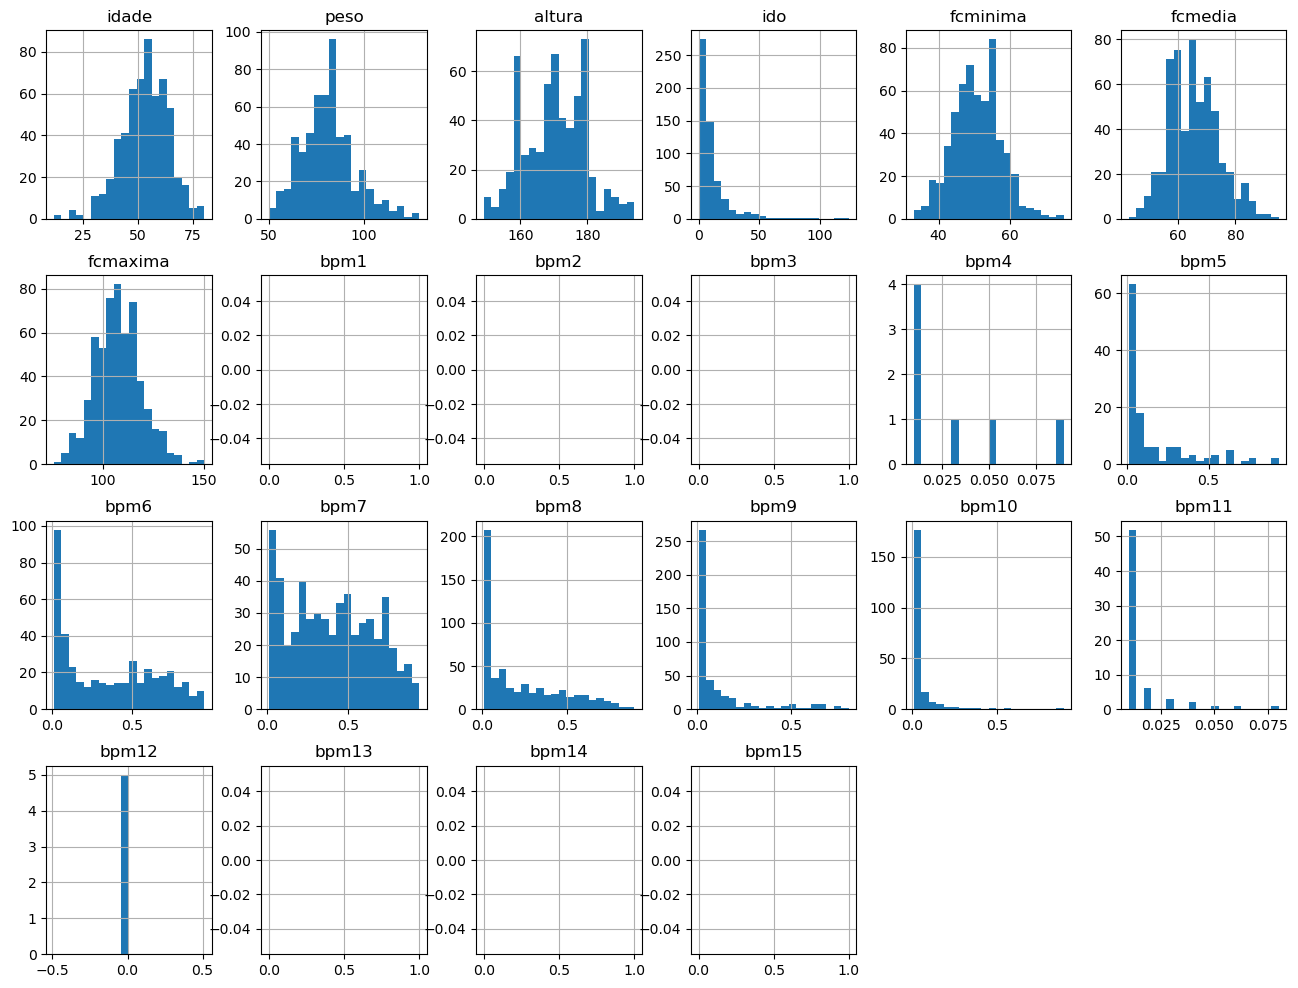

In [10]:
pd.options.plotting.backend = "matplotlib"
dataset[numerical].hist(bins=20, figsize=(16, 12), layout=(4, 6))

#### **3.7. visualização da distribuição da coluna categórica (sexo)**

In [11]:
# sns.displot(dataset, x='sexo')
pd.options.plotting.backend = "plotly"
dataset["sexo"].plot.barh()

#### **3.8. visualização da relação 'peso' e 'ido' em um scatterplot**

In [13]:
# fig, ax = plt.subplots(3, 3, figsize=(15, 10))
# for var, subplot in zip(numerical, ax.flatten()):
#     sns.boxplot(x=var, y='ido', data=dataset, ax=subplot)
# sns.scatterplot(x=dataset['peso'], y=dataset['ido'])
pd.options.plotting.backend = "plotly"
dataset[["peso", "ido"]].plot(kind='scatter', x='peso', y='ido')

#### **3.9. visualização da relação 'idade' e 'ido' em um scatterplot**

In [18]:
# sns.scatterplot(x=dataset['idade'], y=dataset['ido'])
pd.options.plotting.backend = "plotly"
dataset[["idade", "ido"]].plot(kind='scatter', x='idade', y='ido')

#### **3.10. Visualização da distribução de 'peso' e 'ido'**

In [66]:
pd.options.plotting.backend = "plotly"
dataset[["idade", "peso", "ido", "altura"]].plot(kind='box')#, x='peso', y='ido')

<Axes: ylabel='Density'>

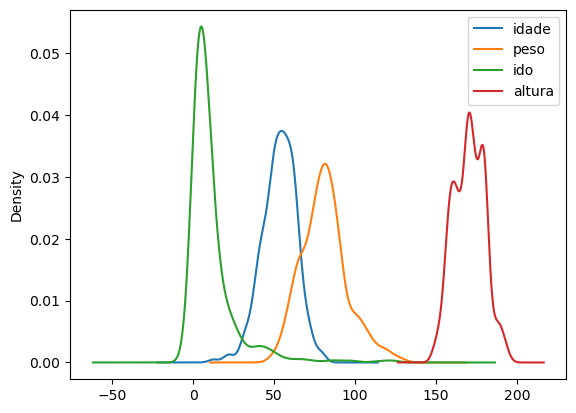

In [67]:
pd.options.plotting.backend = "matplotlib"
dataset[["idade", "peso", "ido", "altura"]].plot(kind='kde')#, x='peso', y='ido')

#### **4. visualização da correlação entre as variáveis**

#### **4.1. visualização tabular da correlação de variáveis (centralizada na variável 'ido')**

In [23]:
dataset[dataset.columns[1:]].corr()['ido'][:].sort_values(ascending=False).to_frame().dropna()

,ido
ido,1.000000
bpm9,0.218159
fcmedia,0.211895
Sequencia_exame,0.210740
peso,0.182459
bpm11,0.178872
fcmaxima,0.165490
fcminima,0.155432
idade,0.144683
bpm8,0.129173


In [32]:
dataset.isnull().sum()

id_paciente        0
idade              0
sexo               0
peso               0
altura             0
Sequencia_exame    0
data_inicio        0
data_termino       0
ido                0
fcminima           0
fcmedia            0
fcmaxima           0
bpm1               0
bpm2               0
bpm3               0
bpm4               0
bpm5               0
bpm6               0
bpm7               0
bpm8               0
bpm9               0
bpm10              0
bpm11              0
bpm12              0
bpm13              0
bpm14              0
bpm15              0
dtype: int64

#### **4.2. visualização do mapa de calor da correlação de variáveis (centralizada na variável 'ido')**

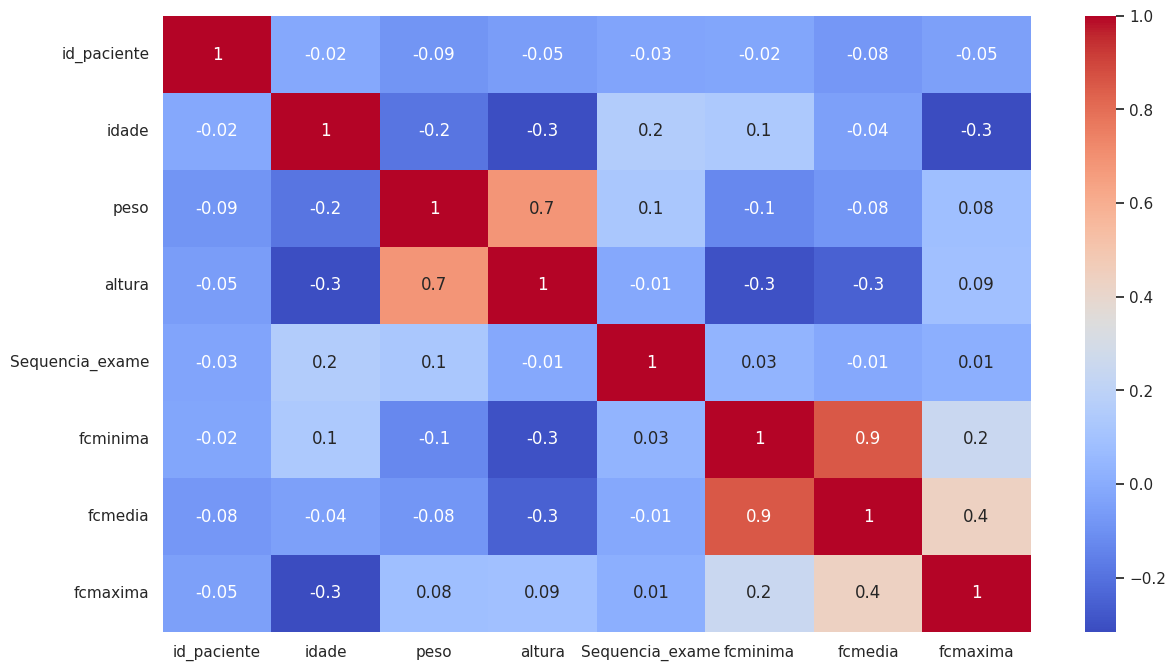

In [60]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = dataset.dropna(axis=1).corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g')